<a href="https://colab.research.google.com/github/anuanmol/TF_4_CNN/blob/main/Intro_to_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's try some computer vision with Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_data, training_label),(test_data, test_label) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9


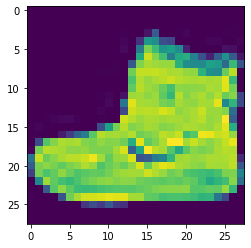

In [ ]:
import matplotlib.pyplot as plt
i1 = training_data[0]
plt.imshow(i1)
print(training_label[0])
# print(len(training_label))
# print("This is how it looks in RGB : ",training_data[0])

In [ ]:
# normalization  to binary format of 0 and 1
training_data = training_data / 255.0
test_data = test_data / 255.0

In [ ]:
# print(training_data[0])

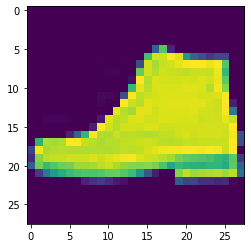

In [ ]:
# for i in range(50):
    # i2 = training_data[i]
    # plt.imshow(i2)
plt.imshow(training_data[42])

In [ ]:
model2 = tf.keras.Sequential([keras.layers.Flatten(),
                              keras.layers.Dense(units=128, activation=tf.nn.relu),
                              keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model2.fit(training_data, training_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6295 - accuracy: 0.7822
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8901


In [ ]:
model2.evaluate(test_data, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8704


[0.3559824824333191, 0.8704000115394592]

In [ ]:
classification = model2.predict(test_data)
print(classification[0])

[6.3613943e-06 4.8979921e-08 1.2116643e-06 3.5075632e-07 4.4483272e-06
 1.4083734e-02 3.4949651e-05 2.6123813e-01 2.1162728e-05 7.2460961e-01]


In [ ]:
model3 = tf.keras.Sequential([tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(units=1024, activation=tf.nn.relu),
                              tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [ ]:
model3.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])
model3.fit(training_data, training_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2670 - accuracy: 0.8999
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2495 - accuracy: 0.9068
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2412 - accuracy: 0.9097
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2230 - accuracy: 0.9140
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2203 - accuracy: 0.9159


In [ ]:
model3.evaluate(test_data, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8840


[0.33556243777275085, 0.8840000033378601]

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print("\n Reached 90% accuracy so cancelling training!")
            self.model.stop_training = True


callback = mycallback()

model4 = tf.keras.Sequential([tf.keras.layers.Flatten(), 
                              tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
                              tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])


In [ ]:
model4.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy", 
               metrics=['accuracy'])

In [ ]:
model4.fit(training_data, training_label, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5839 - accuracy: 0.7949
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3661 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3254 - accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2978 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2803 - accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2605 - accuracy: 0.9027

 Reached 90% accuracy so cancelling training!
